In [ ]:
from sklearn import linear_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# lasso

In [ ]:
A = pd.read_csv("lasso_example.txt",header=None)

In [ ]:
X = A.values[:, 0:4]
y = A.values[:, 4]

In [ ]:
value_coefficients = []
lasso_models = []
alphas = np.logspace(-5, 1, num=7)
for i in alphas:
  lasso_model = linear_model.Lasso(alpha=i,fit_intercept=False)
  lasso_model.fit(X,y)
  lasso_models.append(lasso_model)
  value_coefficients.append(lasso_model.coef_)
value_coefficients = np.array(value_coefficients)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.028e-01, tolerance: 1.348e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.018e-02, tolerance: 1.348e-03
  model = cd_fast.enet_coordinate_descent(


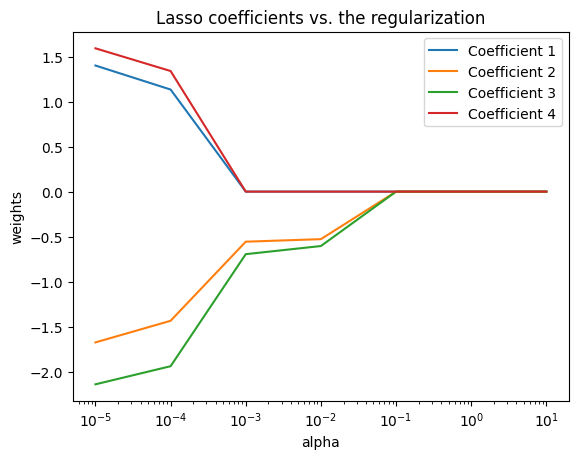

In [ ]:
plt.figure()
for i in range(value_coefficients.shape[1]):
    plt.plot(alphas, value_coefficients[:, i], label=f'Coefficient {i+1}')

plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients vs. the regularization')
plt.legend()
plt.show()

# visualization

Importing from sklearn.metrics mean_squared_error

In [ ]:
from sklearn.metrics import mean_squared_error

Predicting our value and plotting it

In [ ]:
mses = []

for model in lasso_models:
  prediction = model.predict(X)
  mse = mean_squared_error(y, prediction)
  mses.append(mse)

mses = np.array(mses)

Plotting mse vs alphas

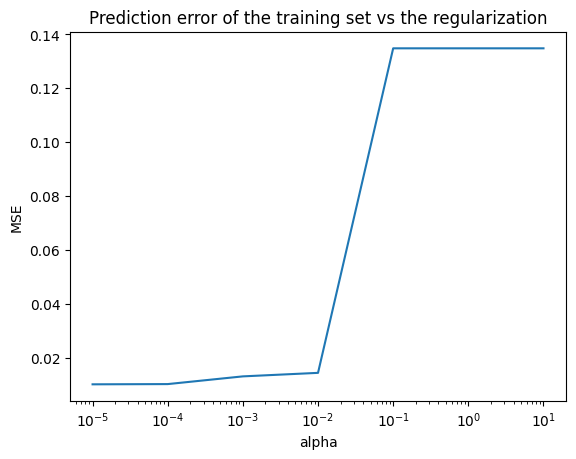

In [ ]:
plt.figure()
plt.plot(alphas, mses)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Prediction error of the training set vs the regularization')
plt.show()

# gridsearcv for ridge,lasso tuning

importing necessary libraries

In [ ]:

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

here I changed to tolerance from default 0.0001 to 0.2 in lasso and 0.01 in ridge for stabilization

**Based on the following print results the best model is Ridge regression with degree 6**

In [ ]:
def return_scores(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

std = StandardScaler().fit(X_train)
X_train_std = std.transform(X_train)
parameters = {'alpha': [10**i for i in range(-5, 10)]}

degrees = [i for i in range(2,11)]
models = {'Ridge': Ridge(max_iter=1000, random_state=0, tol=0.01), 'Lasso': Lasso(max_iter=1000, random_state=0, tol=0.2)}

results = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_std)
    X_test_poly = poly.transform(std.transform(X_test))

    for model_name, model in models.items():
        clf = GridSearchCV(model, parameters, cv=10)
        clf.fit(X_train_poly, y_train)

        best_model = clf.best_estimator_
        metrics = return_scores(best_model, X_test_poly, y_test)
        metrics.update({'Model': model_name, 'Degree': degree, 'Best Alpha': clf.best_params_['alpha']})

        results.append(metrics)

results_df = pd.DataFrame(results)
print(results_df)

         MAE       MSE      RMSE      MAPE        R2  Model  Degree  \
0   0.094814  0.013408  0.115795  0.787257  0.895007  Ridge       2   
1   0.098343  0.014546  0.120607  0.748954  0.886098  Lasso       2   
2   0.094916  0.013141  0.114633  0.763981  0.897102  Ridge       3   
3   0.097947  0.014522  0.120509  0.743027  0.886284  Lasso       3   
4   0.094934  0.013395  0.115736  0.787978  0.895113  Ridge       4   
5   0.097558  0.014152  0.118964  0.736426  0.889181  Lasso       4   
6   0.097420  0.013983  0.118251  0.855967  0.890505  Ridge       5   
7   0.097075  0.014184  0.119098  0.736833  0.888931  Lasso       5   
8   0.096460  0.013831  0.117607  0.859957  0.891695  Ridge       6   
9   0.097123  0.014117  0.118816  0.736098  0.889455  Lasso       6   
10  0.096215  0.013567  0.116478  0.795792  0.893764  Ridge       7   
11  0.096840  0.014118  0.118821  0.734688  0.889446  Lasso       7   
12  0.096323  0.013581  0.116538  0.798281  0.893654  Ridge       8   
13  0.

**Based on the following print results the best model is Ridge regression with degree 6**